<h1 style="color:blue" align="center">Feature Selection</h1>

In this notebook, we will explore the importance of feature selection in machine learning and how it can help improve model performance. We will go through various feature selection techniques and implement them on a dataset to see the effect on model accuracy.

# What is Feature Selection?
Feature selection is the process of selecting a subset of relevant features (variables, predictors) to be used in the model building process. Feature selection helps in reducing the dimensionality of the data by removing irrelevant, redundant, or highly correlated features that can negatively affect model performance. By selecting only the most important features, we can improve model accuracy, reduce overfitting, and enhance model interpretability.

# Why is Feature Selection Important?
There are several reasons why feature selection is important in machine learning:

* **Improves model accuracy**: By selecting only the most important features, we can improve model accuracy and reduce the chance of overfitting.

* **Avoid the curse of dimensionality**: dimensionally cursed phenomena states that, as dimensionality and the number of features increases, the volume of space increases so fast that the available data become limited.

* **Reduces model complexity**: Feature selection helps in reducing the dimensionality of the data, which in turn reduces the complexity of the model and makes it easier to interpret.

* **Reduces training time**: With fewer features to consider, the training time for the model reduces significantly.

* **Enhances model interpretability**: Feature selection helps in identifying the most important features that contribute to the model's output, making it easier to interpret and understand the model.

# Feature Selection Types:

**1- Filter Method:** Selects a subset of variables independently of the model that shall use them.

**2- Wrapper Method:** Selects a subset of variables taking into account the model that will use them.

**3- Embedded Method:** Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. 

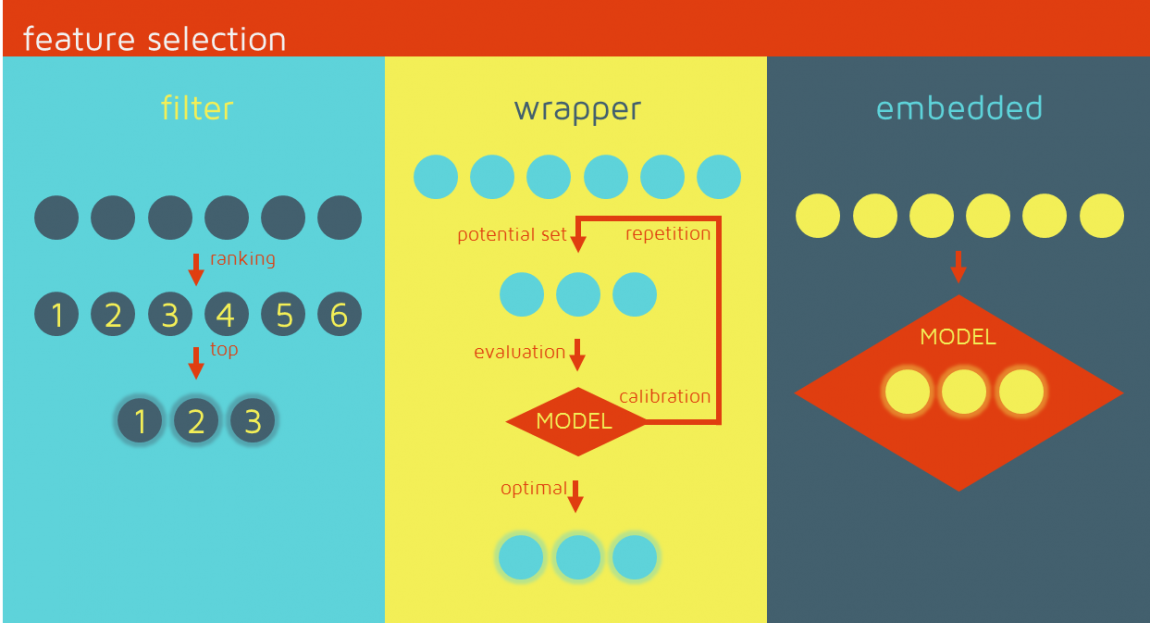


<h2 style="color:blue" align="center">Filter Method</h2>

Filter method is a technique that uses statistical measures to rank the features and select the most relevant ones. It does not involve the model building process and can be applied independently. The filter method works by selecting the features that have the highest correlation with the target variable.

There are several statistical measures that can be used to rank the features, some of the most commonly used ones are:

* **Pearson's Correlation Coefficient**: Measures the linear correlation between two variables. A high correlation coefficient indicates a strong linear relationship between the variables.

* **Chi-Square Test**: Measures the dependence between two categorical variables. A high chi-square value indicates that the two variables are dependent.

* **ANOVA F-Test**: Measures the dependence between a categorical and continuous variable. A high F-value indicates that the continuous variable is dependent on the categorical variable.

### Filter method types:

**1- Univariate:** This method evaluates the significance of each feature with respect to the target variable independently, and then selects the top-ranked features.
    
**2- Multivariate:** Evaluates the relevance (correlation) of the features as a whole, identifying redundant and irrelevant features.

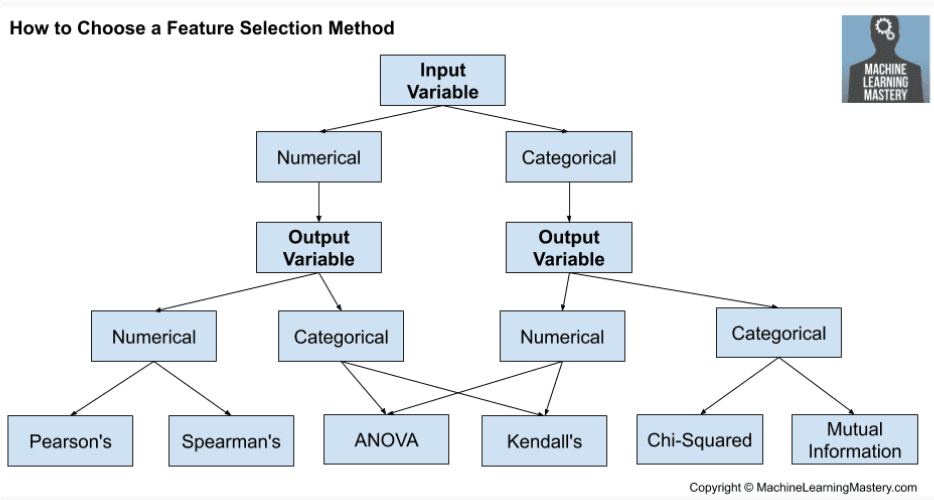

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('diabetes.csv')
x = dataset.drop('Outcome',axis=1)
y = dataset['Outcome']

In [10]:
dataset.shape

(768, 9)

In [9]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

### ANOVA F-test

**ANOVA:** is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

In [12]:
# Define feature selection
from sklearn.feature_selection import SelectKBest, f_classif 

fs = SelectKBest(score_func=f_classif, k=5) #k is the number of top features to select.

In [14]:
# Apply feature selection
fs.fit(x, y)

SelectKBest(k=5)

In [23]:
# True = Top 5 columns as we mentioned k=5
# False = Boolean mask of all the columns
print(fs.get_support(True))
print(fs.get_support(False))

#Print the selected feature names
print(x.columns[(fs.get_support())])

[0 1 5 6 7]
[ True  True False False False  True  True  True]
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


#### Before Feature Selection (Using all the features)

In [30]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

print('* Training score: %.3f' %(rf.score(x_train, y_train)*100))
print('* Testing score (Accuracy): %.3f' %(rf.score(x_test, y_test)*100)) #accuracy_score(y_test,y_pred)
print('* Recall score: %.3f' %(recall_score(y_test,y_pred)*100))
print('* Precision score: %.3f' %(precision_score(y_test,y_pred)*100))
print('* F1 score: %.3f' %(f1_score(y_test,y_pred)*100))

* Training score: 90.717
* Testing score (Accuracy): 79.870
* Recall score: 59.259
* Precision score: 78.049
* F1 score: 67.368


#### After Feature Selection (Using top 5 features)

In [28]:
# Transform your training and testing input (x) to the selected features 
X_train_FS = fs.transform(x_train)
X_test_FS = fs.transform(x_test)

In [31]:
# Rebuild your model using only the best 5 features

rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(X_train_FS, y_train)
y_pred=rf.predict(X_test_FS)

print('* Training score: %.3f' %(rf.score(X_train_FS, y_train)*100))
print('* Testing score (Accuracy): %.3f' %(rf.score(X_test_FS, y_test)*100)) #accuracy_score(y_test,y_pred)
print('* Recall score: %.3f' %(recall_score(y_test,y_pred)*100))
print('* Precision score: %.3f' %(precision_score(y_test,y_pred)*100))
print('* F1 score: %.3f' %(f1_score(y_test,y_pred)*100))

* Training score: 90.065
* Testing score (Accuracy): 79.221
* Recall score: 62.963
* Precision score: 73.913
* F1 score: 68.000


### Chi-Squared

**Chi-Square test:** Used to determine if there is a significant relationship between two categorical (nominal) variables.

In [41]:
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=4)

In [42]:
fs.fit(x,y)

SelectKBest(k=4, score_func=<function chi2 at 0x7fcf0ecbdb80>)

In [43]:
# True = Top 4 columns as we mentioned k=4
# False = Boolean mask of all the columns
print(fs.get_support(True))
print(fs.get_support(False))

#Print the selected feature names
print(x.columns[(fs.get_support())])

[1 4 5 7]
[False  True False False  True  True False  True]
Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


#### Before Feature Selection (Using all the features)

In [44]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

print('* Training score: %.3f' %(rf.score(x_train, y_train)*100))
print('* Testing score (Accuracy): %.3f' %(rf.score(x_test, y_test)*100)) #accuracy_score(y_test,y_pred)
print('* Recall score: %.3f' %(recall_score(y_test,y_pred)*100))
print('* Precision score: %.3f' %(precision_score(y_test,y_pred)*100))
print('* F1 score: %.3f' %(f1_score(y_test,y_pred)*100))

* Training score: 90.717
* Testing score (Accuracy): 79.870
* Recall score: 59.259
* Precision score: 78.049
* F1 score: 67.368


#### After Feature Selection (Using top 5 features)

In [45]:
# Transform your training and testing input (x) to the selected features 
X_train_FS = fs.transform(x_train)
X_test_FS = fs.transform(x_test)

In [46]:
# Rebuild your model using only the best 4 features

rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(X_train_FS, y_train)
y_pred=rf.predict(X_test_FS)

print('* Training score: %.3f' %(rf.score(X_train_FS, y_train)*100))
print('* Testing score (Accuracy): %.3f' %(rf.score(X_test_FS, y_test)*100)) #accuracy_score(y_test,y_pred)
print('* Recall score: %.3f' %(recall_score(y_test,y_pred)*100))
print('* Precision score: %.3f' %(precision_score(y_test,y_pred)*100))
print('* F1 score: %.3f' %(f1_score(y_test,y_pred)*100))

* Training score: 88.925
* Testing score (Accuracy): 80.519
* Recall score: 62.963
* Precision score: 77.273
* F1 score: 69.388


<h2 style="color:blue" align="center">Wrapper Method</h2>

Wrapper method involves selecting a subset of features by iterating through different combinations of features and selecting the combination that gives the best model performance. This technique involves the model building process and can be computationally expensive.

### Wrapper method types:

**1- Forward Selection:**  Starts with an empty set of features and iteratively adds one feature at a time to find the best performing set of features.
    
**2- Backward Selection:** Starts with all the features and iteratively removes one feature at a time to find the best performing set of features. We repeat this until no improvement is observed on removal of features.
    
**3- Exhaustive Selection:** This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

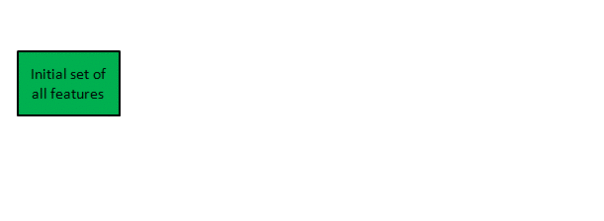

In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [60]:
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)

In [61]:
forwardselection = SFS(rf, 
           k_features=(1,8), 
           forward=True,  #False > for Backward Elimination 
           scoring='accuracy',
           cv=5)
forwardselection = forwardselection.fit(x_train, y_train)

In [62]:
forwardselection.k_feature_idx_

(0, 1, 2, 5, 6, 7)

In [63]:
count=0
for i, name in enumerate (x_train.columns) :
  if i in forwardselection.k_feature_idx_:
    count+=1
    print(name)

Pregnancies
Glucose
BloodPressure
BMI
DiabetesPedigreeFunction
Age


In [64]:
count

6

In [65]:
forwardselection.k_score_ 

0.7687724910035986

In [66]:
X_train_fs = forwardselection.transform(x_train)
X_test_fs = forwardselection.transform(x_test)

In [67]:
# Rebuild your model using only the best selected features
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(X_train_fs, y_train)
y_pred=rf.predict(X_test_fs)

print('* Training score: %.3f' %(rf.score(X_train_fs, y_train)*100))
print('* Testing score (Accuracy): %.3f' %(rf.score(X_test_fs, y_test)*100)) #accuracy_score(y_test,y_pred)
print('* Recall score: %.3f' %(recall_score(y_test,y_pred)*100))
print('* Precision score: %.3f' %(precision_score(y_test,y_pred)*100))
print('* F1 score: %.3f' %(f1_score(y_test,y_pred)*100))

* Training score: 90.879
* Testing score (Accuracy): 79.221
* Recall score: 61.111
* Precision score: 75.000
* F1 score: 67.347


<h2 style="color:blue" align="center">Embedded Method</h2>

Wrapper methods provide better results in terms of performance, but they’ll also cost us a lot of computation time/resources. So, if we could include the feature selection process in ML model training itself? That could lead us to even better features for that model, in a shorter amount of time. This is where embedded methods come into play.

Embedded method involves selecting the most important features during the model training process. This technique involves building a model and selecting the features based on their importance in the model.

Some of the commonly used embedded methods are:

* **Lasso Regression**: Applies L1 regularization to the model coefficients and encourages sparsity in the coefficient matrix. The features with non-zero coefficients are selected as the most important features.

* **Tree-based (i.e. Random Forest)**: Measures the importance of features by calculating the decrease in impurity when a feature is used to split the tree nodes. The features with the highest impurity decrease are selected as the most important features.



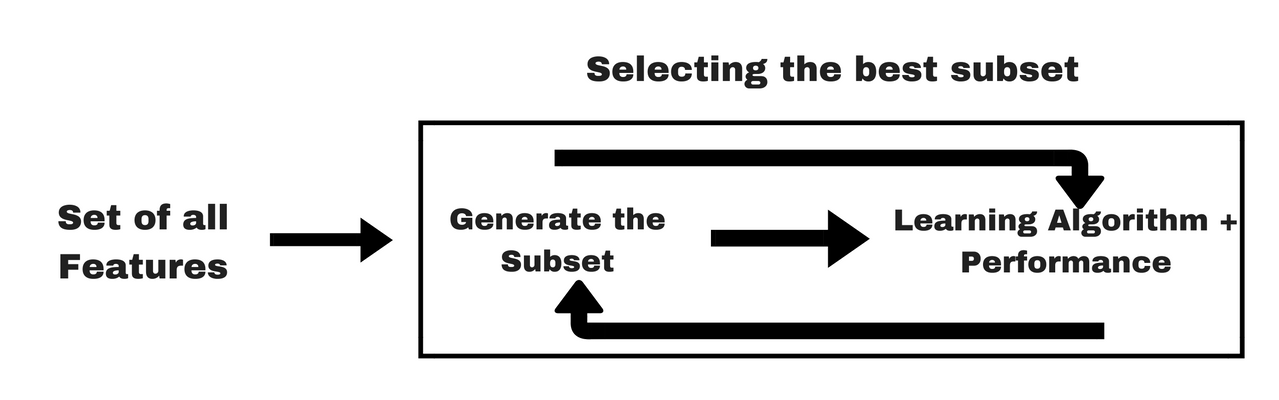

In [68]:
# Without feature selection check accuracy with Random forest
rf=RandomForestClassifier(max_depth=15, min_samples_leaf=4, random_state=0)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

print('* Training score: %.3f' %(rf.score(x_train, y_train)*100))
print('* Testing score (Accuracy): %.3f' %(rf.score(x_test, y_test)*100)) #accuracy_score(y_test,y_pred)
print('* Recall score: %.3f' %(recall_score(y_test,y_pred)*100))
print('* Precision score: %.3f' %(precision_score(y_test,y_pred)*100))
print('* F1 score: %.3f' %(f1_score(y_test,y_pred)*100))

* Training score: 90.717
* Testing score (Accuracy): 79.870
* Recall score: 59.259
* Precision score: 78.049
* F1 score: 67.368


<AxesSubplot:xlabel='Features', ylabel='Importances'>

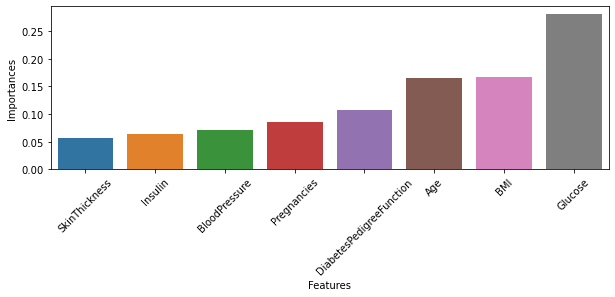

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# get the importance of the resulting features.
importances = rf.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)